<a href="https://colab.research.google.com/github/ApoorvaKhanna/utilityPrograms/blob/master/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstration of feature selection of categorical variables for breast cancer dataset .

**Reading data**


**Converting to numpy array with strings**

**Use of Ordial Encoder**

**Use of Label Encoder**

**Feature Selection Techniques :**

**Chi-Squared Statistic**

**Mutual Information Statistic**

**f_classif**



[Reference ](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

**Import Library**

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
import sklearn.feature_selection as skfs
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import KFold


from sklearn.svm import SVC

from sklearn import tree

!pip install tensorflow==2.0
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import feature_column
from tensorflow.keras import datasets, layers, models,regularizers


**Import Data**


Dataset : [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer)

In [0]:
filename = 'breast-cancer.csv'
data = pd.read_csv(filename,header =None)
# retrieve numpy array
dataset = data.values

In [49]:
data

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [0]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [0]:
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = pd.read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 


In [29]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


[OrinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
 Used to Encode ,input variables in single column of features per variable




[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
Used to Encode , Target variables in different classes , here is for 0 or 1 (Binary Classification)

In [0]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [31]:
y_train.shape

(191,)

In [0]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

**chi2 : The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.**

**f_classif : Compute the ANOVA F-value for the provided sample.**

**mutual_info_classif : Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.**

In [0]:
def select_features(feature_select_func,X_train, y_train, X_test):
	fs = SelectKBest(score_func=feature_select_func , k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
	

In [0]:
def plot_features(fs): 
	for i in range(len(fs.scores_)):
		print('Feature %d: %f' % (i, fs.scores_[i]))
	# plot the scores
	pyplot.title(str(name))
	pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
	pyplot.show()

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


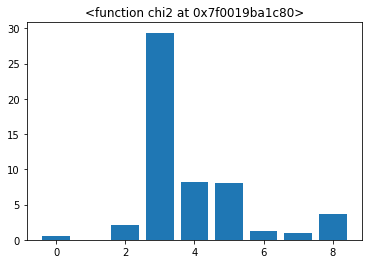

Feature 0: 1.192779
Feature 1: 0.032763
Feature 2: 1.901125
Feature 3: 8.661716
Feature 4: 8.436469
Feature 5: 18.030146
Feature 6: 2.343632
Feature 7: 1.369470
Feature 8: 5.020085


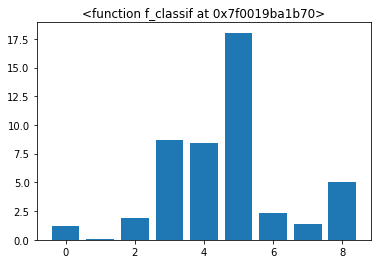

Feature 0: 0.008184
Feature 1: 0.000000
Feature 2: 0.091371
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.067717
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.027801


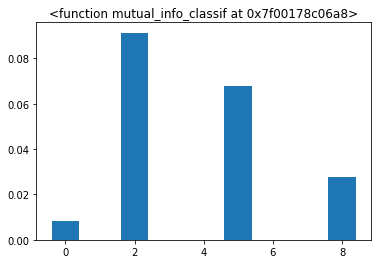

In [60]:
selection_technique = [skfs.chi2,skfs.f_classif,skfs.mutual_info_classif]
for i,name in enumerate(selection_technique):
	#print(i)
	X_train_fs, X_test_fs, fs = select_features(name,X_train_enc, y_train_enc, X_test_enc)
	# what are scores for the features
	plot_features(fs)

Different Feature Selection Techniques gives different important features . So , One of the ways is to select different n features and compare accuracy .

**Using Logistic Regression**

In [64]:
print("Base Model With All features")
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
f1score = f1_score(y_test_enc,yhat) 
print('Accuracy: %.2f' % (accuracy*100))
print('F1Score: %.2f' % (f1score*100))

#fit the model

for i,name in enumerate(selection_technique):
  print("Model -> " , name)
  X_train_fs, X_test_fs, fs = select_features(name,X_train_enc, y_train_enc, X_test_enc)
  model = LogisticRegression(solver='liblinear')
  model.fit(X_train_fs, y_train_enc)
  # evaluate the model
  yhat = model.predict(X_test_fs)
  # evaluate predictions
  accuracy = accuracy_score(y_test_enc, yhat)
  f1score = f1_score(y_test_enc,yhat) 
  print('Accuracy: %.2f' % (accuracy*100))
  print('F1Score: %.2f' % (f1score*100))
#  plot_features(fs)


Base Model With All features
Accuracy: 75.79
F1Score: 48.89
Model ->  <function chi2 at 0x7f0019ba1c80>
Accuracy: 73.68
F1Score: 39.02
Model ->  <function f_classif at 0x7f0019ba1b70>
Accuracy: 73.68
F1Score: 39.02
Model ->  <function mutual_info_classif at 0x7f00178c06a8>
Accuracy: 70.53
F1Score: 26.32


No handles with labels found to put in legend.


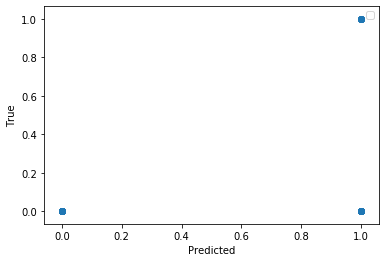

In [36]:
pyplot.scatter(y_test_enc, yhat , )
pyplot.xlabel('Predicted')
pyplot.ylabel('True')
pyplot.legend()
pyplot.show()

**Using SVM to find accuracy of chosen features**

In [37]:
print("Base Model With All features using model SVM")
model = SVC(gamma='auto')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
f1score = f1_score(y_test_enc,yhat) 
print('Accuracy: %.2f' % (accuracy*100))
print('F1Score: %.2f' % (f1score*100))

#fit the model

for i,name in enumerate(selection_technique):
  print("Model -> " , name)
  X_train_fs, X_test_fs, fs = select_features(name,X_train_enc, y_train_enc, X_test_enc)
  model = SVC(C=1.5,gamma='auto')
  model.fit(X_train_fs, y_train_enc)
  # evaluate the model
  yhat = model.predict(X_test_fs)
  # evaluate predictions
  accuracy = accuracy_score(y_test_enc, yhat)
  f1score = f1_score(y_test_enc,yhat) 
  print('Accuracy: %.2f' % (accuracy*100))
  print('F1Score: %.2f' % (f1score*100))

Base Model With All features using model SVM
Accuracy: 68.42
F1Score: 21.05
Model ->  <function chi2 at 0x7f0019ba1c80>
Accuracy: 76.84
F1Score: 52.17
Model ->  <function f_classif at 0x7f0019ba1b70>
Accuracy: 76.84
F1Score: 52.17
Model ->  <function mutual_info_classif at 0x7f00178c06a8>
Accuracy: 68.42
F1Score: 44.44


In [57]:
model= tree.DecisionTreeClassifier()
model.fit(X_train_enc,y_train_enc)

yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
f1score = f1_score(y_test_enc,yhat) 

print('Accuracy: %.2f' % (accuracy*100))
print('F1Score: %.2f' % (f1score*100))
for i,name in enumerate(selection_technique):
  print("Model -> " , name)
  X_train_fs, X_test_fs, fs = select_features(name,X_train_enc, y_train_enc, X_test_enc)
  model = SVC(C=1.5,gamma='auto')
  model.fit(X_train_fs, y_train_enc)
  # evaluate the model
  yhat = model.predict(X_test_fs)
  # evaluate predictions
  accuracy = accuracy_score(y_test_enc, yhat)
  f1score = f1_score(y_test_enc,yhat) 
  print('Accuracy: %.2f' % (accuracy*100))
  print('F1Score: %.2f' % (f1score*100))


Accuracy: 72.63
F1Score: 51.85


**Decision Tree**

In [58]:
model= tree.DecisionTreeClassifier()
model.fit(X_train_enc,y_train_enc)
yhat = model.predict(X_test_enc)
# evaluate predictions

accuracy = accuracy_score(y_test_enc, yhat)
f1score = f1_score(y_test_enc,yhat) 

print('Accuracy: %.2f' % (accuracy*100))
print('F1Score: %.2f' % (f1score*100))

for i,name in enumerate(selection_technique):
  print("Model -> " , name)
  X_train_fs, X_test_fs, fs = select_features(name,X_train_enc, y_train_enc, X_test_enc)
  model= tree.DecisionTreeClassifier()
  model.fit(X_train_enc,y_train_enc)

  yhat = model.predict(X_test_enc)
  # evaluate predictions
  accuracy = accuracy_score(y_test_enc, yhat)
  f1score = f1_score(y_test_enc,yhat) 
  print('Accuracy: %.2f' % (accuracy*100))
  print('F1Score: %.2f' % (f1score*100))


Accuracy: 71.58
F1Score: 49.06
Model ->  <function chi2 at 0x7f0019ba1c80>
Accuracy: 67.37
F1Score: 39.22
Model ->  <function f_classif at 0x7f0019ba1b70>
Accuracy: 70.53
F1Score: 44.00
Model ->  <function mutual_info_classif at 0x7f00178c06a8>
Accuracy: 72.63
F1Score: 51.85


**Using Simple FCNN**

In [0]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2, activation='relu',kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#compilethemodel
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(X_train_fs, y_train_enc, epochs=20, batch_size=16, shuffle=True)

Train on 191 samples
Epoch 1/20
191/191 [==============================] - 0s 3ms/sample - loss: 0.6662 - accuracy: 0.7382
Epoch 2/20
191/191 [==============================] - 0s 137us/sample - loss: 0.6629 - accuracy: 0.7382
Epoch 3/20
191/191 [==============================] - 0s 144us/sample - loss: 0.6601 - accuracy: 0.7382
Epoch 4/20
191/191 [==============================] - 0s 127us/sample - loss: 0.6576 - accuracy: 0.7330
Epoch 5/20
191/191 [==============================] - 0s 146us/sample - loss: 0.6551 - accuracy: 0.7330
Epoch 6/20
191/191 [==============================] - 0s 142us/sample - loss: 0.6532 - accuracy: 0.7330
Epoch 7/20
191/191 [==============================] - 0s 138us/sample - loss: 0.6514 - accuracy: 0.7277
Epoch 8/20
191/191 [==============================] - 0s 139us/sample - loss: 0.6499 - accuracy: 0.7277
Epoch 9/20
191/191 [==============================] - 0s 149us/sample - loss: 0.6475 - accuracy: 0.7277
Epoch 10/20
191/191 [========================

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  20        
_________________________________________________________________
dense_7 (Dense)              multiple                  10        
_________________________________________________________________
dense_8 (Dense)              multiple                  3         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
